# Linear Regression

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [3]:
# Convert inputs and targets to tensors

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs, inputs.size())
print(targets, targets.size())

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]]) torch.Size([15, 3])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]]) torch.Size([15, 2])


In [4]:
# Random weights and biases

w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.3026,  1.3755,  0.1945],
        [-2.1087, -0.5182,  0.4162]], requires_grad=True)
tensor([-1.8073, -0.3773], requires_grad=True)


In [5]:
def model(x):
    return x @ w.t() + b

In [6]:
preds = model(inputs)
preds

tensor([[ 120.8105, -171.1297],
        [ 159.2292, -211.2265],
        [ 220.1258, -229.1256],
        [  95.4072, -222.3418],
        [ 164.7425, -166.4841],
        [ 119.7376, -172.7201],
        [ 158.0482, -210.2921],
        [ 220.6230, -230.8180],
        [  96.4800, -220.7513],
        [ 164.6344, -163.9592],
        [ 119.6295, -170.1953],
        [ 158.1563, -212.8170],
        [ 221.3068, -230.0600],
        [  95.5153, -224.8667],
        [ 165.8154, -164.8936]], grad_fn=<AddBackward0>)

In [7]:
# Loss 
def MSE(preds, targets):
    diff = preds - targets
    return torch.sum(diff*diff) / diff.numel()

In [8]:
init_loss = MSE(preds, targets)
init_loss

tensor(46576.3203, grad_fn=<DivBackward0>)

In [9]:
# Compute gradients (~~ sum of gradient of weight and bias)
init_loss.backward()
print('Old loss:', init_loss)

Old loss: tensor(46576.3203, grad_fn=<DivBackward0>)


In [10]:
print(w.grad)
print(b.grad)

tensor([[  6506.7803,   6788.5552,   4154.9395],
        [-24771.5957, -26133.0898, -16221.8730]])
tensor([  76.0175, -292.1121])


In [11]:
# Adjust weights & reset gradients
# Calculating and ensuring old w and b not change
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [12]:
# Calculate loss (again)
preds = model(inputs)
new_loss = MSE(preds, targets)

print('New loss:', new_loss)

New loss: tensor(31414.2910, grad_fn=<DivBackward0>)


In [13]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = MSE(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [14]:
# Calculate loss
preds = model(inputs)
new_loss = MSE(preds, targets)

print('New loss after Gradient descent for 100 ep:', new_loss)

New loss after Gradient descent for 100 ep: tensor(59.8555, grad_fn=<DivBackward0>)


# Neural Network

In [15]:
from torch.utils.data import TensorDataset as td

In [16]:
train_ds = td(inputs, targets)
print(train_ds[0:3])

(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.]]))


In [17]:
from torch.utils.data import DataLoader

In [18]:
# Define data loader with devided batch sizes and SHUFFLING
BATCH_SIZE = 5
train_dataloader = DataLoader(train_ds, BATCH_SIZE, shuffle=True)

In [19]:
for x, y in train_dataloader:
    print(x)
    print(y)

tensor([[102.,  43.,  37.],
        [ 68.,  96.,  71.],
        [ 88., 134.,  59.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.]])
tensor([[ 22.,  37.],
        [104., 118.],
        [118., 132.],
        [ 56.,  70.],
        [ 81., 101.]])
tensor([[103.,  43.,  36.],
        [ 87., 134.,  58.],
        [101.,  44.,  37.],
        [ 91.,  87.,  65.],
        [ 74.,  66.,  43.]])
tensor([[ 20.,  38.],
        [119., 133.],
        [ 21.,  38.],
        [ 80., 102.],
        [ 57.,  69.]])
tensor([[ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [ 68.,  97.,  70.],
        [ 69.,  96.,  70.]])
tensor([[ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [102., 120.],
        [103., 119.]])


In [20]:
import torch.nn as nn 

model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0996, -0.5061, -0.2316],
        [ 0.4310,  0.3558, -0.4370]], requires_grad=True)
Parameter containing:
tensor([0.4363, 0.3332], requires_grad=True)


In [21]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0996, -0.5061, -0.2316],
         [ 0.4310,  0.3558, -0.4370]], requires_grad=True),
 Parameter containing:
 tensor([0.4363, 0.3332], requires_grad=True)]

In [22]:
# Init prediction 
preds = model(inputs)
preds

tensor([[-50.7004,  36.8441],
        [-67.9844,  42.8975],
        [-89.4778,  60.1633],
        [-40.0516,  43.4238],
        [-71.2323,  33.6413],
        [-50.2938,  36.9192],
        [-67.7099,  42.1047],
        [-89.8090,  60.1573],
        [-40.4582,  43.3486],
        [-71.3644,  32.7734],
        [-50.4258,  36.0513],
        [-67.5779,  42.9726],
        [-89.7523,  60.9561],
        [-39.9196,  44.2917],
        [-71.6389,  33.5662]], grad_fn=<AddmmBackward>)

In [23]:
# Import nn.functional
import torch.nn.functional as F

# Init loss 
init_loss = F.mse_loss(preds, targets)
init_loss

tensor(12815.7773, grad_fn=<MseLossBackward>)

In [24]:
# Define optimizer 
from torch.optim import SGD 

optimizer = SGD(model.parameters(), lr = 1e-5)

In [25]:
# Fit
def fit(model, train_dataloader, optimizer, num_epochs):
    # store loss/ep
    loss_list = []
    ep_list = []
    
    # Repeat for given number of epochs
    for ep in range(num_epochs):
        
        # Train with batches of data
        for x, y in train_dataloader:
            
            #1. Generate prediction
            pred = model(x)
            
            #2. Calculate loss
            loss = F.mse_loss(pred, y)
            
            #3. Calculate grad
            loss.backward()
            
            #4. Update param by optimizer
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        epp = ep+1
        # Print the progress
        if (epp) % 10 == 0:
            loss_list.append(loss.item())
            ep_list.append(epp)
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epp, num_epochs, loss.item()))           
    
    return loss_list, ep_list

In [26]:
loss_list, ep_list = fit(model, train_dataloader, optimizer, num_epochs=120)

Epoch [10/120], Loss: 855.4656
Epoch [20/120], Loss: 505.5941
Epoch [30/120], Loss: 386.2552
Epoch [40/120], Loss: 96.1634
Epoch [50/120], Loss: 289.8842
Epoch [60/120], Loss: 124.0078
Epoch [70/120], Loss: 61.3975
Epoch [80/120], Loss: 77.4702
Epoch [90/120], Loss: 92.3944
Epoch [100/120], Loss: 43.2455
Epoch [110/120], Loss: 46.9814
Epoch [120/120], Loss: 17.4498


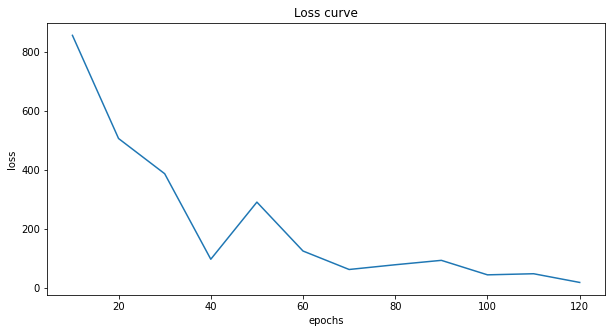

In [27]:
plt.figure(figsize=(10,5))
plt.title('Loss curve')
plt.plot(ep_list, loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [28]:
preds = model(inputs)

print(torch.sum(targets - preds))

tensor(-6.4269, grad_fn=<SumBackward0>)
